# Importing necessary packages

In [2378]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import numpy as np

# Loading the csv file

In [2379]:
# Load the CSV file into a DataFrame
df = pd.read_csv("CSE.csv")
df["Frequency of Onsite Programming Contests:"].value_counts()

Frequency of Onsite Programming Contests:
Occasionally    40
Rarely          29
Monthly         10
Weekly           6
Never            2
Name: count, dtype: int64

# Dataset cleaning

In [2380]:
clean_data = df.copy()
clean_data.sample(30)
clean_data["Frequency of Onsite Programming Contests:"].value_counts()

Frequency of Onsite Programming Contests:
Occasionally    40
Rarely          29
Monthly         10
Weekly           6
Never            2
Name: count, dtype: int64

## Dropping irrelevant columns

In [2381]:
clean_data.drop(["Timestamp", "Name (Optional):", 'Gender:', 'University Name:','Year of Study:', "Is there anything else you would like to share about your university's academic environment, peer support, your achievements, or factors influencing academic achievement in the CSE field? (Open-ended)"], axis=1, inplace = True)

In [2382]:
clean_data.columns

Index(['Grade Point Average (Optional):',
       'Presence of Programming Club in your Department:',
       'Frequency of Onsite Programming Contests:',
       'Availability of Project Showcasing Opportunities:',
       'Frequency of Seminars/Workshops on Different Topics:',
       'Are there sufficient research opportunities provided by your department for undergraduate students?',
       'Does your department provide funding or support for students' research projects or initiatives?',
       'Do you feel that the student-teacher ratio in your department is satisfactory?',
       'How would you rate the quality of teaching in your department?',
       'How supportive are your teachers in helping you learn technical skills?',
       'How would you rate the current programming environment provided by your department?',
       'How successful do you feel in acquiring CSE skills?  ',
       'Are there specialized labs for areas such as networking, artificial intelligence, data science, et

In [2383]:
clean_data.shape

(89, 22)

## Column name abbriviation

In [2384]:
clean_data.rename(columns={
    'Grade Point Average (Optional):': 'cgpa',
    'Presence of Programming Club in your Department:': 'programmingClub',
    'Frequency of Onsite Programming Contests:': 'programmingContest',
    'Availability of Project Showcasing Opportunities:': 'projectShowcasing',
    'Frequency of Seminars/Workshops on Different Topics:': 'seminarWorkshop',
    'Are there sufficient research opportunities provided by your department for undergraduate students?': 'researchOpportunities',
    "Does your department provide funding or support for students' research projects or initiatives?": 'fundingSupportResearch',
    'Do you feel that the student-teacher ratio in your department is satisfactory?': 'studentTeacherRatio',
    'How would you rate the quality of teaching in your department?': 'qualityOfTeaching',
    'How supportive are your teachers in helping you learn technical skills?': 'supportiveTeachersTechnicalSkill',
    'How would you rate the current programming environment provided by your department?': 'programmingEnvironment',
    'How successful do you feel in acquiring CSE skills?  ': 'successfulFeelOrNot',
    'Are there specialized labs for areas such as networking, artificial intelligence, data science, etc.?': 'specializedLabs',
    'Have you participated in any internships or industry placements related to your CSE studies?': 'internshipsOrIndustryPlacement',
    'Does your department collaborate with industries for on-campus recruitment opportunities for students?': 'onCampusRecruitment',
    'Does the department offer peer mentoring programs where senior students mentor junior students in CSE-related topics?': 'arrangePeerMentoringPrograms',
    'Are there peer-led workshops or tutorials on CSE-related topics organized by students for skill development?': 'arrangePeerledWorkshopsOrTutorials',
    'How many projects or initiatives have you been involved in during your undergraduate period in the CSE department? (Any types of project)': 'numberOfProjectsOrInitiatives',
    'Have you received any awards, scholarships, or recognition for your achievements in the CSE field?': 'receiveAwardsScholarships',
    'Have you secured any employment or job offers in the CSE field before graduation?': 'secureEmploymentOrJobOffers',
    'Are you interested in pursuing a career in the CSE field after graduation?': 'interestCareerInTheCSEfield',
    'Finally, considering your overall experience, how would you describe the academic environment and peer mentoring support in your department?': 'finallyAcademicEnvironmentAndPeerMentoringSupport'
}, inplace=True)

In [2385]:
clean_data.columns

Index(['cgpa', 'programmingClub', 'programmingContest', 'projectShowcasing',
       'seminarWorkshop', 'researchOpportunities', 'fundingSupportResearch',
       'studentTeacherRatio', 'qualityOfTeaching',
       'supportiveTeachersTechnicalSkill', 'programmingEnvironment',
       'successfulFeelOrNot', 'specializedLabs',
       'internshipsOrIndustryPlacement', 'onCampusRecruitment',
       'arrangePeerMentoringPrograms', 'arrangePeerledWorkshopsOrTutorials',
       'numberOfProjectsOrInitiatives', 'receiveAwardsScholarships',
       'secureEmploymentOrJobOffers', 'interestCareerInTheCSEfield',
       'finallyAcademicEnvironmentAndPeerMentoringSupport'],
      dtype='object')

In [2386]:
clean_data.shape
clean_data["programmingContest"].value_counts()

programmingContest
Occasionally    40
Rarely          29
Monthly         10
Weekly           6
Never            2
Name: count, dtype: int64

## Treating data entry errors
##### we got entry errors only in cgpa column

In [2387]:
def modify_grade(grade):
    if(grade !=grade):
        return grade
    temp=""
    for i in grade:
        if (i>="0" and i<="9"):
            temp+=(i)
        elif(i=="."):
            temp+=i
            
    return temp if temp!="." else float("NaN")

clean_data.cgpa=clean_data.cgpa.apply(lambda x: modify_grade(x))
clean_data["cgpa"]

0      3.7
1     3.89
2      3.2
3      3.6
4     3.67
      ... 
84     NaN
85    2.94
86     3.6
87     NaN
88     3.7
Name: cgpa, Length: 89, dtype: object

## Transforming data type
##### we got irrelevant data type only for cgpa column

In [2388]:
clean_data.cgpa=clean_data.cgpa.astype("float")
# type(clean_data.cgpa)
clean_data["cgpa"]

0     3.70
1     3.89
2     3.20
3     3.60
4     3.67
      ... 
84     NaN
85    2.94
86    3.60
87     NaN
88    3.70
Name: cgpa, Length: 89, dtype: float64

# Missing value imputation

In [2389]:
clean_data.isna().sum()

cgpa                                                 39
programmingClub                                       1
programmingContest                                    2
projectShowcasing                                     3
seminarWorkshop                                       1
researchOpportunities                                 4
fundingSupportResearch                                5
studentTeacherRatio                                   2
qualityOfTeaching                                     2
supportiveTeachersTechnicalSkill                      2
programmingEnvironment                                2
successfulFeelOrNot                                   1
specializedLabs                                       3
internshipsOrIndustryPlacement                        4
onCampusRecruitment                                   5
arrangePeerMentoringPrograms                          3
arrangePeerledWorkshopsOrTutorials                    4
numberOfProjectsOrInitiatives                   

## For numerical data column

In [2390]:
clean_data[clean_data["cgpa"]>4]

,cgpa,programmingClub,programmingContest,projectShowcasing,seminarWorkshop,researchOpportunities,fundingSupportResearch,studentTeacherRatio,qualityOfTeaching,supportiveTeachersTechnicalSkill,...,specializedLabs,internshipsOrIndustryPlacement,onCampusRecruitment,arrangePeerMentoringPrograms,arrangePeerledWorkshopsOrTutorials,numberOfProjectsOrInitiatives,receiveAwardsScholarships,secureEmploymentOrJobOffers,interestCareerInTheCSEfield,finallyAcademicEnvironmentAndPeerMentoringSupport
56,300.0,No,Monthly,Occasionally,Monthly,"No, Inadequate.",No,"Yes, the student-teacher ratio is satisfactory.",Average,Neutral: Teachers neither actively help nor hi...,...,No,Yes,"Yes, but the collaborations are limited in scope.","Yes, sometimes","Yes, sometimes",1,No,Yes,Yes,Poor


#### outlier detected
#### we used median imputaion

In [2391]:
clean_data["cgpa"].fillna(clean_data["cgpa"].median(), inplace = True)
clean_data["cgpa"].isna().sum()

0

## For categorical data columns
##### mode imputation

In [2392]:
cat_columns = clean_data.columns[1:].tolist()
cat_columns

['programmingClub',
 'programmingContest',
 'projectShowcasing',
 'seminarWorkshop',
 'researchOpportunities',
 'fundingSupportResearch',
 'studentTeacherRatio',
 'qualityOfTeaching',
 'supportiveTeachersTechnicalSkill',
 'programmingEnvironment',
 'successfulFeelOrNot',
 'specializedLabs',
 'internshipsOrIndustryPlacement',
 'onCampusRecruitment',
 'arrangePeerMentoringPrograms',
 'arrangePeerledWorkshopsOrTutorials',
 'numberOfProjectsOrInitiatives',
 'receiveAwardsScholarships',
 'secureEmploymentOrJobOffers',
 'interestCareerInTheCSEfield',
 'finallyAcademicEnvironmentAndPeerMentoringSupport']

In [2393]:
clean_data["programmingEnvironment"].value_counts()

programmingEnvironment
Poor         29
Fair         22
Good         20
Very Poor     9
Excellent     7
Name: count, dtype: int64

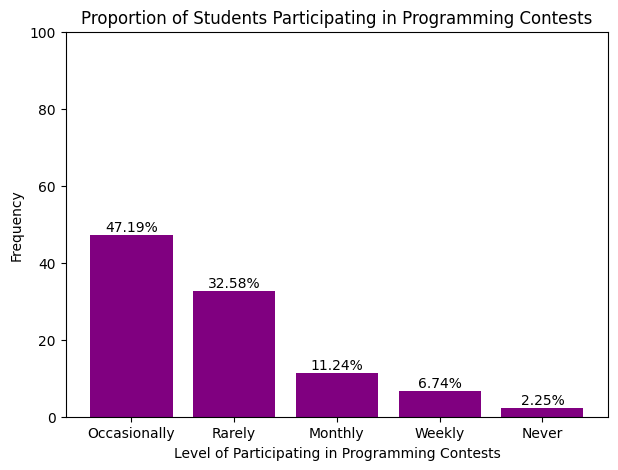

array([47.19101124, 32.58426966, 11.23595506,  6.74157303,  2.24719101])

In [2394]:
# for col in cat_columns:
#     last_value = clean_data[col].value_counts().index[0]
#     clean_data[col] = clean_data[col].fillna(last_value)
# clean_data.isna().sum()
# clean_data[
clean_data["programmingContest"].fillna("Occasionally", inplace = True)
clean_data["programmingContest"].value_counts().values
parcentage = (clean_data["programmingContest"].value_counts().values/89)*100

contest_counts = clean_data['programmingContest'].value_counts().keys()

# Plot a pie chart
plt.figure(figsize=(7, 5))
plt.bar(contest_counts, parcentage, color="purple")
# plt.pie(clean_data['programmingContest'].value_counts(), labels=clean_data['programmingContest'].value_counts().index, autopct='%1.1f%%', startangle=140)
# contest_counts.plot(kind='bar', color='purple')
plt.title('Proportion of Students Participating in Programming Contests')
plt.xlabel("Level of Participating in Programming Contests")
plt.ylabel("Frequency") 
plt.ylim(0, 100)  # Ensure y-axis starts from 0 and ends at 100
# plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, val in enumerate(parcentage):
    plt.text(i, val + 1, f"{val:.2f}%", horizontalalignment='center', fontsize=10)
plt.savefig("Proportion of Students Participating in Programming Contests.pdf")
plt.show()
# clean_data["programmingContest"].value_counts().values
parcentage

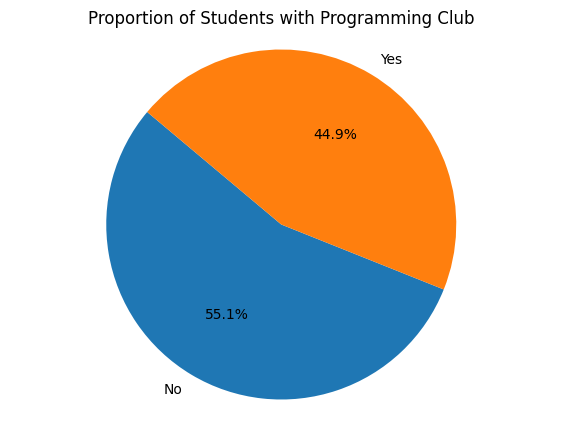

In [2395]:
clean_data["programmingClub"].fillna("No", inplace = True)
clean_data["programmingClub"].value_counts()
club_counts = clean_data['programmingClub'].value_counts()

##Plot a pie chart
plt.figure(figsize=(7, 5))
plt.pie(club_counts, labels=club_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Students with Programming Club')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Proportion of Students with Programming Club.pdf")
plt.show()

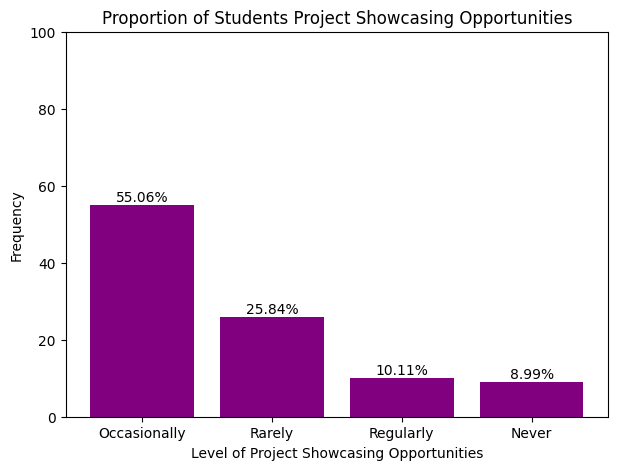

In [2396]:
clean_data["projectShowcasing"].fillna("Occasionally", inplace = True)
showcasing_counts = clean_data['projectShowcasing'].value_counts().keys()
parcentage = (clean_data["projectShowcasing"].value_counts().values/89)*100


# Plot a pie chart
plt.figure(figsize=(7, 5))
plt.bar(showcasing_counts, parcentage, color="purple") 
plt.title('Proportion of Students Project Showcasing Opportunities')
# plt.axis('equal')
plt.xlabel("Level of Project Showcasing Opportunities")
plt.ylabel("Frequency")
plt.savefig('Proportion of Students Project Showcasing Opportunities.pdf')
plt.ylim(0, 100) 
for i, val in enumerate(parcentage):
    plt.text(i, val + 1, f"{val:.2f}%", horizontalalignment='center', fontsize=10)
plt.savefig("Proportion of Students Participating in Programming Contests.pdf")
plt.show()

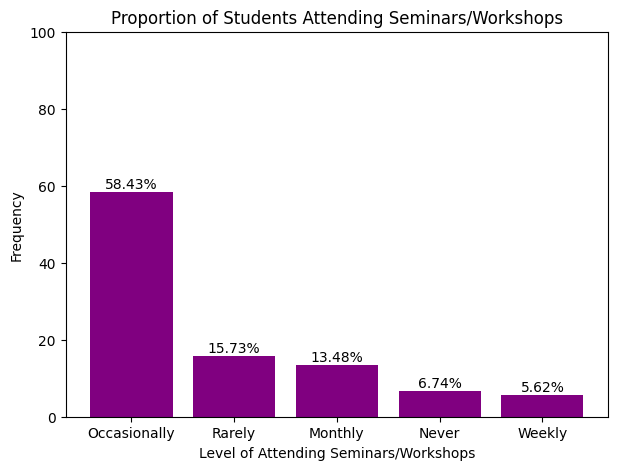

In [2397]:
clean_data["seminarWorkshop"].fillna("Occasionally", inplace = True)
workshop_counts = clean_data['seminarWorkshop'].value_counts().keys()

parcentage = (clean_data["seminarWorkshop"].value_counts().values/89)*100
# plt.axis('equal')
# Plot a pie chart
plt.figure(figsize=(7, 5))
plt.bar(workshop_counts, parcentage, color="purple")
plt.title('Proportion of Students Attending Seminars/Workshops')
plt.xlabel("Level of Attending Seminars/Workshops")
plt.ylabel("Frequency")
plt.ylim(0, 100) 
for i, val in enumerate(parcentage):
    plt.text(i, val + 1, f"{val:.2f}%", horizontalalignment='center', fontsize=10)
plt.savefig('Proportion of Students Attending Seminars.pdf')
plt.show()

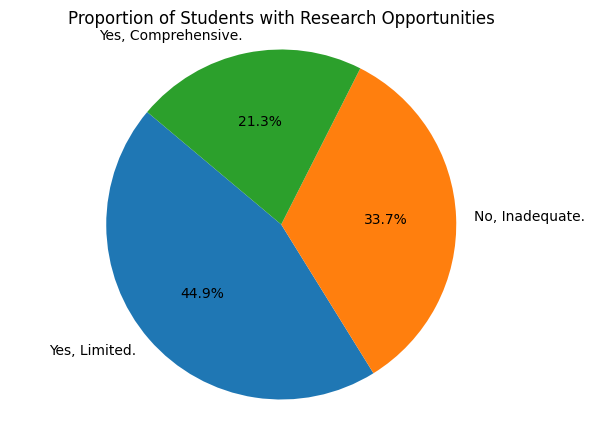

In [2398]:
clean_data["researchOpportunities"].fillna("Yes, Limited.", inplace = True)
research_counts = clean_data['researchOpportunities'].value_counts()

# Plot a pie chart
plt.figure(figsize=(7, 5))
plt.pie(research_counts, labels=research_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Students with Research Opportunities')
plt.axis('equal')
plt.savefig('Proportion of Students with Research Opportunities.pdf')# Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

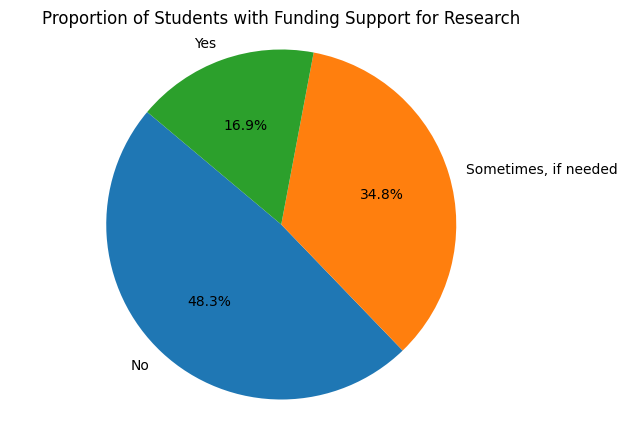

In [2399]:
clean_data["fundingSupportResearch"].fillna("No", inplace = True)
funding_counts = clean_data['fundingSupportResearch'].value_counts()

# Plot a pie chart
plt.figure(figsize=(7, 5))
plt.pie(funding_counts, labels=funding_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Students with Funding Support for Research')
plt.axis('equal') 
plt.savefig('Proportion of Students with Funding Support for Research.pdf')
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

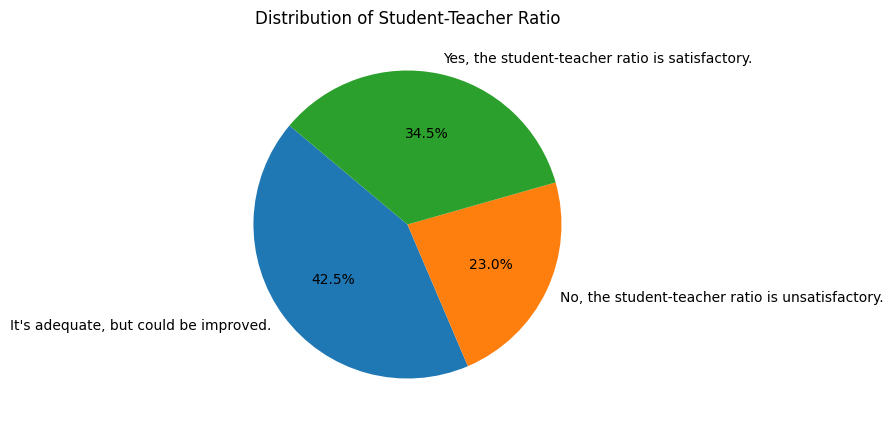

In [2400]:
clean_data["studentTeacherRatio"]
ratio_counts = ratio_counts

# # Plot a bar graph
plt.figure(figsize=(7, 5))
# ratio_counts.plot(kind='bar', color='skyblue')
plt.pie(ratio_counts, labels=ratio_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Student-Teacher Ratio')
# plt.xlabel('Student-Teacher Ratio')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Distribution of Student-Teacher Ratio.pdf')
plt.show()

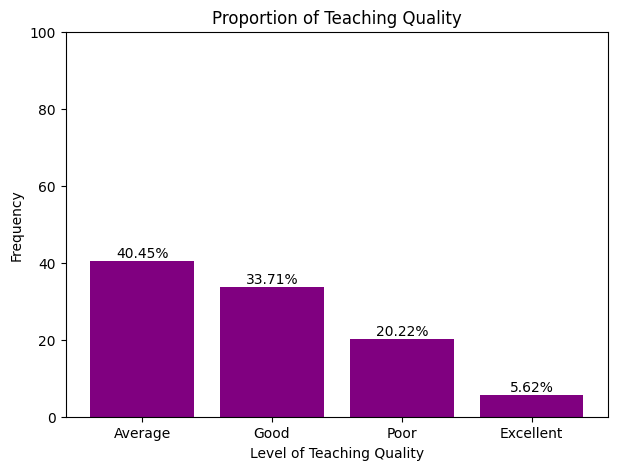

In [2401]:
clean_data["qualityOfTeaching"].fillna("Average", inplace = True)
q = clean_data["qualityOfTeaching"].value_counts().keys()
parcentage = (clean_data["qualityOfTeaching"].value_counts().values/89)*100
# plt.axis('equal')
# Plot a pie chart
plt.figure(figsize=(7, 5))
plt.bar(q, parcentage, color="purple")
plt.title('Proportion of Teaching Quality')
plt.xlabel("Level of Teaching Quality")
plt.ylabel("Frequency")
plt.ylim(0, 100) 
for i, val in enumerate(parcentage):
    plt.text(i, val + 1, f"{val:.2f}%", horizontalalignment='center', fontsize=10)
plt.savefig("teaching quality.pdf")
plt.show()

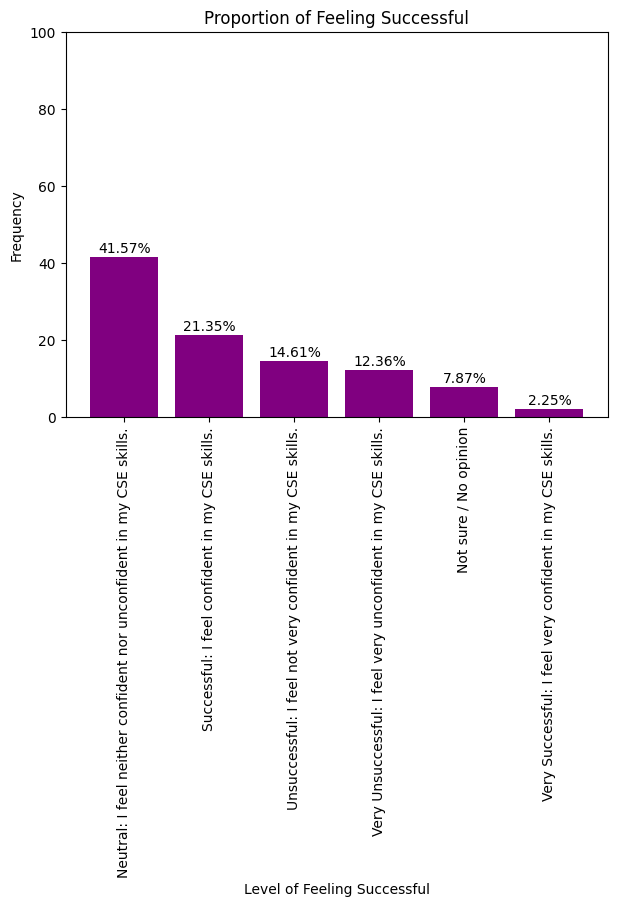

In [2402]:
clean_data["successfulFeelOrNot"].fillna("Neutral: I feel neither confident nor unconfident in my CSE skills.", inplace = True)
q = list(clean_data["successfulFeelOrNot"].value_counts().keys())
parcentage = (clean_data["successfulFeelOrNot"].value_counts().values/89)*100
# q[0] = "1"
# q[1] = "2"
# q[2] = "3"
# q[3] = "4"
# q[4] = "5"
# q[5] = "6"
# q[6] = "7"
# plt.axis('equal')
# Plot a pie chart
plt.figure(figsize=(7, 5))
plt.bar(q, parcentage, color="purple")
plt.title('Proportion of Feeling Successful')
plt.xlabel("Level of Feeling Successful")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.ylim(0, 100) 
for i, val in enumerate(parcentage):
    plt.text(i, val + 1, f"{val:.2f}%", horizontalalignment='center', fontsize=10)
plt.savefig("feeling successful.pdf")
plt.show()


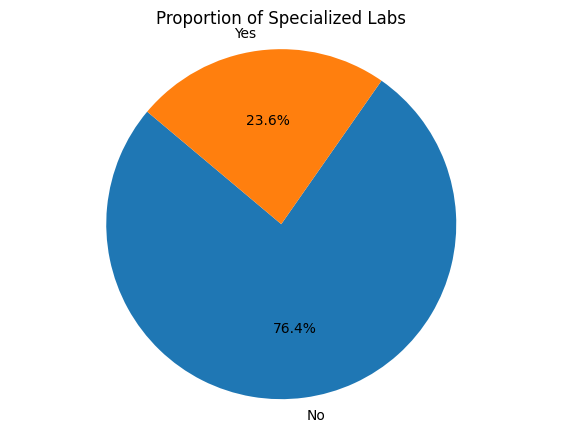

In [2403]:
clean_data["specializedLabs"].fillna("No", inplace = True)
q = clean_data['specializedLabs'].value_counts()

##Plot a pie chart
plt.figure(figsize=(7, 5))
plt.pie(q, labels=q.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Specialized Labs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Proportion of Specialized Labs.pdf")
plt.show()

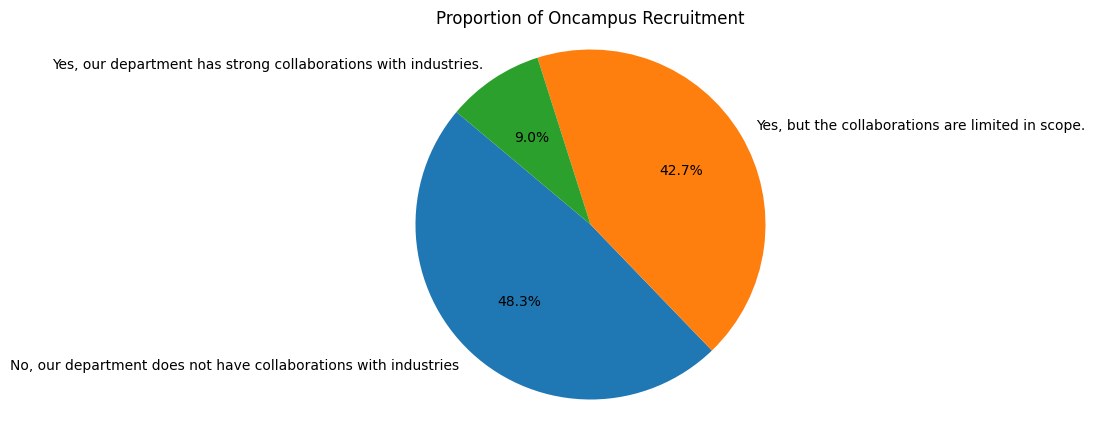

In [2404]:
clean_data["onCampusRecruitment"].fillna("No, our department does not have collaborations with industries", inplace = True)
q = clean_data['onCampusRecruitment'].value_counts()

##Plot a pie chart
plt.figure(figsize=(7, 5))
plt.pie(q, labels=q.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Oncampus Recruitment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Proportion of onCampusRecruitment.pdf")
plt.show()

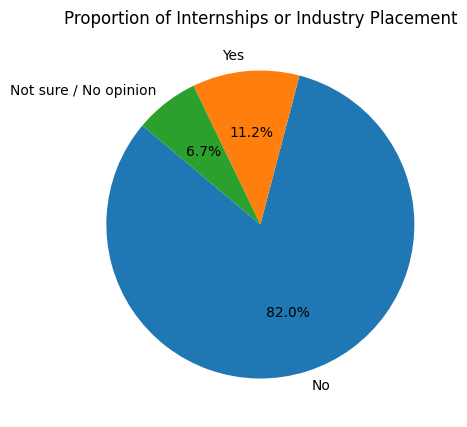

In [2405]:
clean_data["internshipsOrIndustryPlacement"].fillna("No", inplace = True)
q = clean_data['internshipsOrIndustryPlacement'].value_counts()

##Plot a pie chart
plt.figure(figsize=(7, 5))
plt.pie(q, labels=q.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Internships or Industry Placement')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Proportion of internshipsOrIndustryPlacement.pdf")
plt.show()

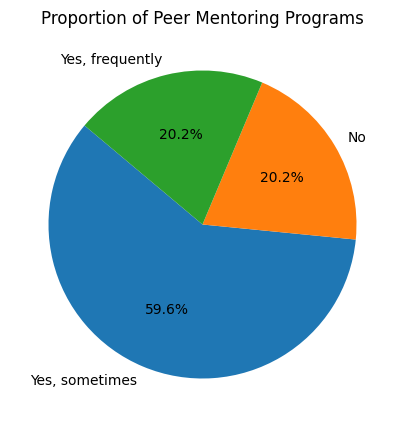

In [2406]:
clean_data["arrangePeerMentoringPrograms"].fillna("Yes, sometimes", inplace = True)
q = clean_data['arrangePeerMentoringPrograms'].value_counts()

##Plot a pie chart
plt.figure(figsize=(7, 5))
plt.pie(q, labels=q.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Peer Mentoring Programs')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Proportion of arrangePeerMentoringPrograms.pdf")
plt.show()

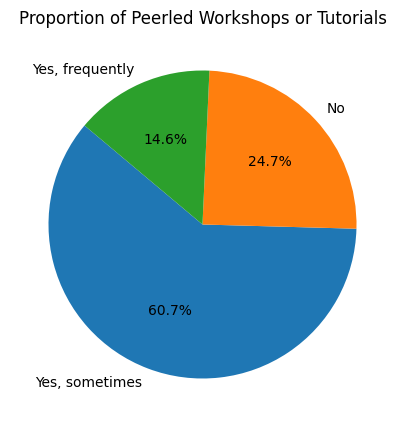

In [2407]:
clean_data["arrangePeerledWorkshopsOrTutorials"].fillna("Yes, sometimes", inplace = True)
q = clean_data['arrangePeerledWorkshopsOrTutorials'].value_counts()

##Plot a pie chart
plt.figure(figsize=(7, 5))
plt.pie(q, labels=q.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Peerled Workshops or Tutorials')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Proportion of arrangePeerledWorkshopsOrTutorials.pdf")
plt.show()

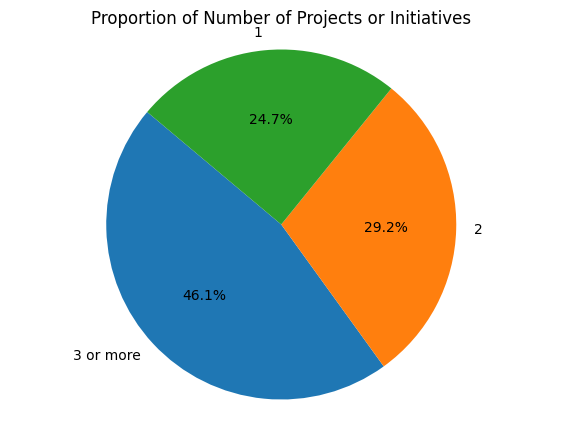

In [2408]:
clean_data["numberOfProjectsOrInitiatives"].fillna("3 or more", inplace = True)
q = clean_data['numberOfProjectsOrInitiatives'].value_counts()
plt.figure(figsize=(7, 5))
plt.pie(q, labels=q.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Number of Projects or Initiatives')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Proportion of numberOfProjectsOrInitiatives.pdf")
plt.show()

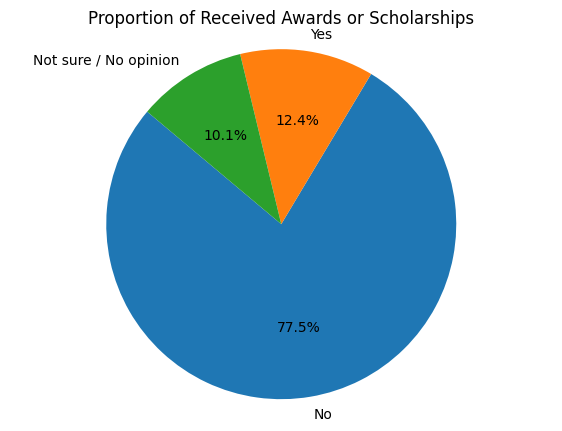

In [2409]:
clean_data["receiveAwardsScholarships"].fillna("No", inplace = True)
q = clean_data['receiveAwardsScholarships'].value_counts()
plt.figure(figsize=(7, 5))
plt.pie(q, labels=q.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Received Awards or Scholarships')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Proportion of receiveAwardsScholarships.pdf")
plt.show()

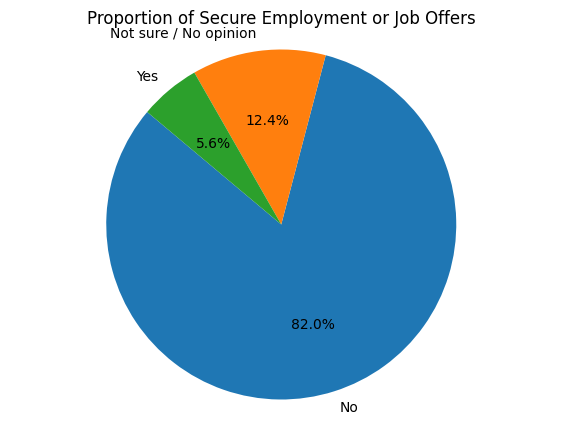

In [2410]:
clean_data["secureEmploymentOrJobOffers"].fillna("No", inplace = True)
q = clean_data['secureEmploymentOrJobOffers'].value_counts()
plt.figure(figsize=(7, 5))
plt.pie(q, labels=q.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Secure Employment or Job Offers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Proportion of secureEmploymentOrJobOffers.pdf")
plt.show()

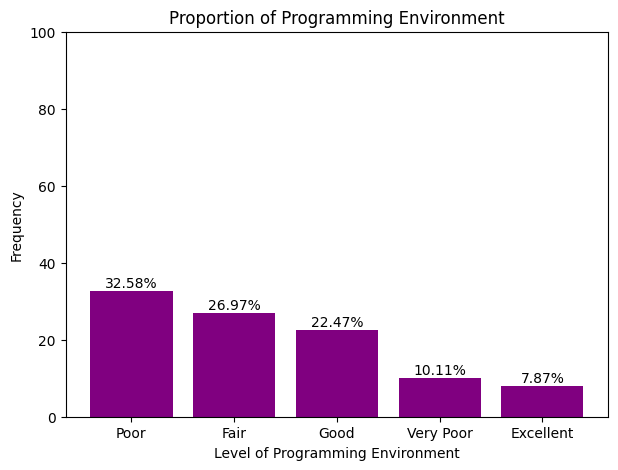

In [2411]:
clean_data["programmingEnvironment"].fillna("Fair", inplace = True)

q = clean_data['programmingEnvironment'].value_counts().keys()
parcentage = (clean_data["programmingEnvironment"].value_counts().values/89)*100
# plt.axis('equal')
# Plot a pie chart
plt.figure(figsize=(7, 5))
plt.bar(q, parcentage, color="purple")
plt.title('Proportion of Programming Environment')
plt.xlabel("Level of Programming Environment")
plt.ylabel("Frequency")
plt.xticks(rotation = 0)
plt.ylim(0, 100) 
for i, val in enumerate(parcentage):
    plt.text(i, val + 1, f"{val:.2f}%", horizontalalignment='center', fontsize=10) # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Proportion of programmingEnvironment.pdf")
plt.show()

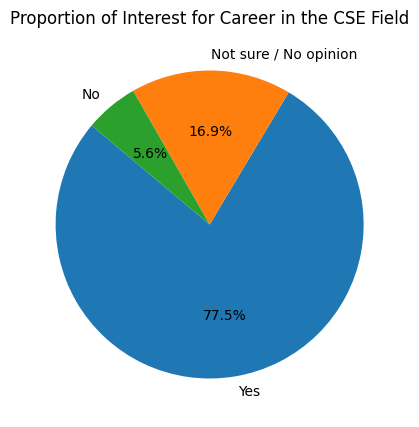

In [2412]:
clean_data["interestCareerInTheCSEfield"].fillna("Yes", inplace = True)
q = clean_data['interestCareerInTheCSEfield'].value_counts()
plt.figure(figsize=(7, 5))
plt.pie(q, labels=q.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Interest for Career in the CSE Field')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Proportion of interestCareerInTheCSEfield.pdf")
plt.show()

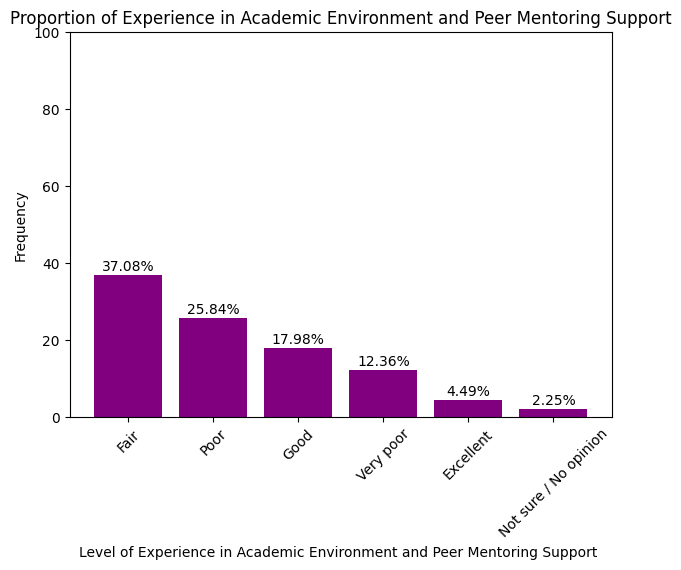

In [2413]:
clean_data["finallyAcademicEnvironmentAndPeerMentoringSupport"].fillna("Fair", inplace = True)
q = clean_data['finallyAcademicEnvironmentAndPeerMentoringSupport'].value_counts().keys()
parcentage = (clean_data["finallyAcademicEnvironmentAndPeerMentoringSupport"].value_counts().values/89)*100
# plt.axis('equal')
# Plot a pie chart
plt.figure(figsize=(7, 5))
plt.bar(q, parcentage, color="purple")
plt.title('Proportion of Experience in Academic Environment and Peer Mentoring Support')
plt.xlabel("Level of Experience in Academic Environment and Peer Mentoring Support ")
plt.ylabel("Frequency")
plt.xticks(rotation = 45)
plt.ylim(0, 100) 
for i, val in enumerate(parcentage):
    plt.text(i, val + 1, f"{val:.2f}%", horizontalalignment='center', fontsize=10) # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Proportion of Academic Environment and Peer Mentoring Support.pdf")
plt.show()

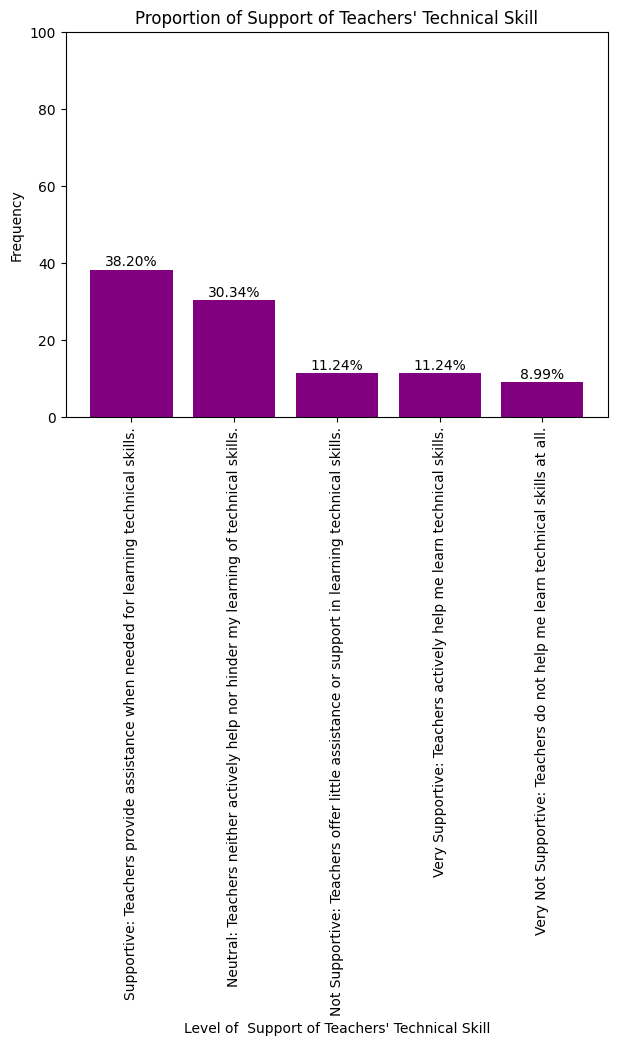

['Supportive: Teachers provide assistance when needed for learning technical skills.',
 'Neutral: Teachers neither actively help nor hinder my learning of technical skills.',
 'Not Supportive: Teachers offer little assistance or support in learning technical skills.',
 'Very Supportive: Teachers actively help me learn technical skills.',
 'Very Not Supportive: Teachers do not help me learn technical skills at all.']

In [2456]:
clean_data["supportiveTeachersTechnicalSkill"].fillna("Supportive: Teachers provide assistance when needed for learning technical skills.", inplace = True)
q = list(clean_data['supportiveTeachersTechnicalSkill'].value_counts().keys())
parcentage = (clean_data["supportiveTeachersTechnicalSkill"].value_counts().values/89)*100
# plt.axis('equal')
# Plot a pie chart
# q[0] = "1"
# q[1] = "2"
# q[2] = "3"
# q[3] = "4"
# q[4] = "5"
plt.figure(figsize=(7, 5))
plt.bar(q, parcentage, color="purple")
plt.title("Proportion of Support of Teachers' Technical Skill")
plt.xlabel("Level of  Support of Teachers' Technical Skill")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.ylim(0, 100) 
for i, val in enumerate(parcentage):
    plt.text(i, val + 1, f"{val:.2f}%", horizontalalignment='center', fontsize=10) # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Proportion of  Support for Teachers' Technical Skill.pdf")
plt.show()
q

## Ouliers detecting and treating

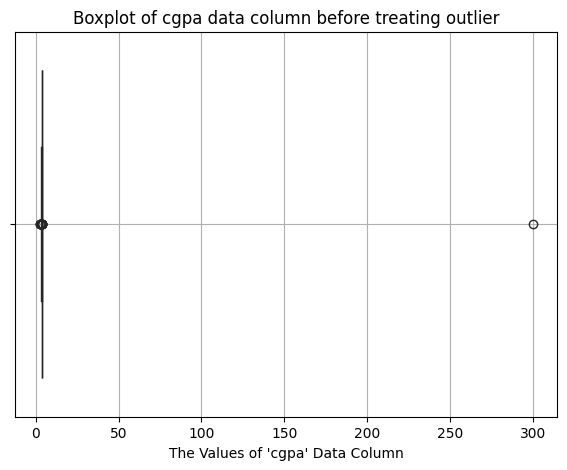

In [2415]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = clean_data, x = clean_data["cgpa"], color = 'purple')
plt.title('Boxplot of cgpa data column before treating outlier')
plt.xlabel("The Values of 'cgpa' Data Column")
plt.grid(True)
plt.savefig('Boxplot of cgpa data column before treating outlier.pdf')
plt.show()

In [2416]:
zScore = zscore(clean_data["cgpa"])   ## we got outliers in cgpa column. one value is so far from maximum value
outliers = (np.abs(zScore>3))
outliers.sum()

1

In [2417]:
# clean_data= clean_data.apply(lambda x: winsorize(x, limits = 0.1), inplace=True)
# clean_data
# outliers.sum()
clean_data["cgpa"] = winsorize(clean_data["cgpa"], limits=0.18)
zScore = zscore(clean_data["cgpa"])   ## we got outliers in cgpa column. one value is so far from maximum value
outliers = (np.abs(zScore>3))
outliers.sum()

0

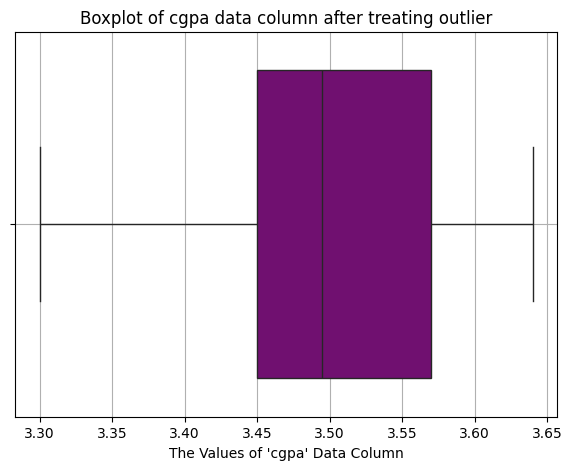

In [2418]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = clean_data, x = clean_data["cgpa"], color = 'purple')
plt.title('Boxplot of cgpa data column after treating outlier')
plt.grid(True)
plt.xlabel("The Values of 'cgpa' Data Column")
plt.savefig('Boxplot of cgpa data column after treating outlier.pdf')
plt.show()

##### Exporting clean dataset

In [2419]:
clean_data.to_csv("Clean_Dataset.csv")

## Label encoding

In [2420]:
labeled_data = clean_data.copy()
labeled_data.head(2)
# clean_data.isna().sum()

,cgpa,programmingClub,programmingContest,projectShowcasing,seminarWorkshop,researchOpportunities,fundingSupportResearch,studentTeacherRatio,qualityOfTeaching,supportiveTeachersTechnicalSkill,...,specializedLabs,internshipsOrIndustryPlacement,onCampusRecruitment,arrangePeerMentoringPrograms,arrangePeerledWorkshopsOrTutorials,numberOfProjectsOrInitiatives,receiveAwardsScholarships,secureEmploymentOrJobOffers,interestCareerInTheCSEfield,finallyAcademicEnvironmentAndPeerMentoringSupport
0,3.64,No,Occasionally,Rarely,Occasionally,"Yes, Limited.",No,"It's adequate, but could be improved.",Average,Supportive: Teachers provide assistance when n...,...,No,Yes,"No, our department does not have collaboration...","Yes, sometimes","Yes, sometimes",3 or more,Yes,No,Yes,Fair
1,3.64,No,Occasionally,Rarely,Rarely,"No, Inadequate.",No,"It's adequate, but could be improved.",Poor,Very Not Supportive: Teachers do not help me l...,...,No,No,"No, our department does not have collaboration...","Yes, sometimes",No,2,No,No,Not sure / No opinion,Very poor


In [2421]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    if clean_data[column].dtype == 'object':
        labeled_data[column] = label_encoder.fit_transform(clean_data[column])
    # unique_values = list(clean_data[column].unique())
    # unique_values.sort()
    # labeled_data[column] = pd.Categorical(clean_data[column], categories=unique_values, ordered=True).codes
labeled_data["programmingClub"].value_counts()

programmingClub
0    49
1    40
Name: count, dtype: int64

##### Exporting labeled_dataset

In [2422]:
labeled_data.to_csv("Labeled_Dataset.csv")

# PCA

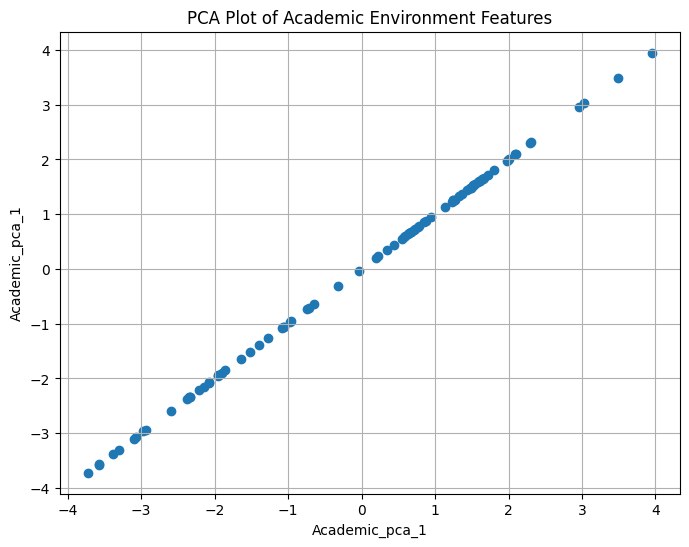

Explained Variance Ratio: [0.32410343]


In [2423]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select the features for PCA
selected_features = ['programmingClub', 'programmingContest', 'projectShowcasing',
                     'seminarWorkshop', 'researchOpportunities', 'fundingSupportResearch',
                     'studentTeacherRatio', 'qualityOfTeaching', 'programmingEnvironment',
                     'specializedLabs', 'onCampusRecruitment', 'finallyAcademicEnvironmentAndPeerMentoringSupport']

# Extract the selected features from the DataFrame
X = labeled_data[selected_features]

# Perform PCA
pca = PCA(n_components=1)  # You can adjust the number of components as needed
X_pca = pca.fit_transform(X)

# Create a DataFrame with the principal components and rename columns
academic_pca_df = pd.DataFrame(data=X_pca, columns=['Academic_pca_1'])

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(academic_pca_df['Academic_pca_1'], academic_pca_df['Academic_pca_1'])
plt.title('PCA Plot of Academic Environment Features')
plt.xlabel('Academic_pca_1')
plt.ylabel('Academic_pca_1')
plt.grid(True)
plt.savefig("PCA Plot of Academic Environment Features.pdf")
plt.show()

# Print explained variance ratio
print('Explained Variance Ratio:', pca.explained_variance_ratio_)



In [2424]:
import pandas as pd

# Assuming academic_pca_df is the DataFrame containing the principal components for the academic environment
print("DataFrame for Academic Environment Principal Components:")
print(academic_pca_df)

# Similarly, print DataFrames for other categories if available


DataFrame for Academic Environment Principal Components:
    Academic_pca_1
0         1.609984
1        -2.971107
2        -3.577730
3        -1.524436
4         1.136337
..             ...
84        2.101539
85        0.646441
86        2.956981
87        1.660111
88        1.999975

[89 rows x 1 columns]


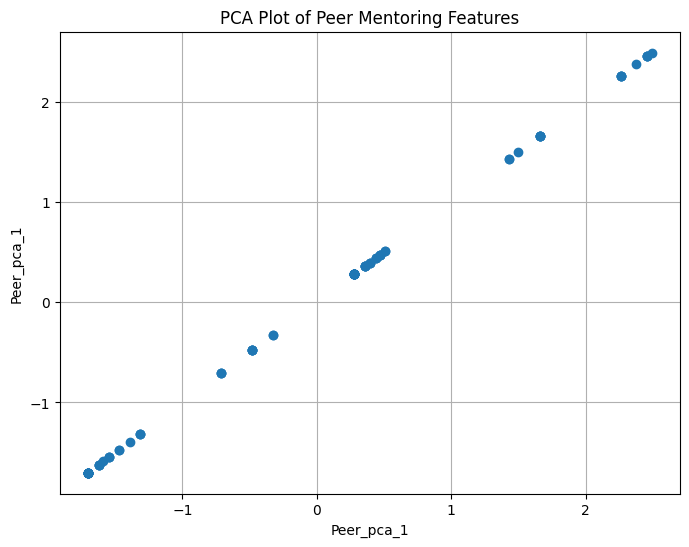

Explained Variance Ratio: [0.55993719]


In [2425]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select the features for PCA
selected_features = ['supportiveTeachersTechnicalSkill', 'arrangePeerMentoringPrograms', 'arrangePeerledWorkshopsOrTutorials']

# Extract the selected features from the DataFrame
X = labeled_data[selected_features]

# Perform PCA
pca = PCA(n_components=1)  # You can adjust the number of components as needed
X_pca = pca.fit_transform(X)

# Create a DataFrame with the principal components and rename columns
peer_pca_df = pd.DataFrame(data=X_pca, columns=['Peer_pca_1'])

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(peer_pca_df['Peer_pca_1'], peer_pca_df['Peer_pca_1'])
plt.title('PCA Plot of Peer Mentoring Features')
plt.xlabel('Peer_pca_1')
plt.ylabel('Peer_pca_1')
plt.grid(True)
plt.savefig("PCA Plot of Peer Mentoring Features.pdf")
plt.show()

# Print explained variance ratio
print('Explained Variance Ratio:', pca.explained_variance_ratio_)

In [2426]:
# Assuming peer_pca_df is the DataFrame containing the principal components for the peer mentoring
print("DataFrame for Peer mentoring Principal Components:")
print(peer_pca_df)

# Similarly, print DataFrames for other categories if available

DataFrame for Peer mentoring Principal Components:
    Peer_pca_1
0     0.278873
1     1.499345
2     1.657311
3    -0.481065
4     0.278873
..         ...
84    0.436839
85   -1.701537
86    0.357856
87    2.259283
88   -1.586403

[89 rows x 1 columns]


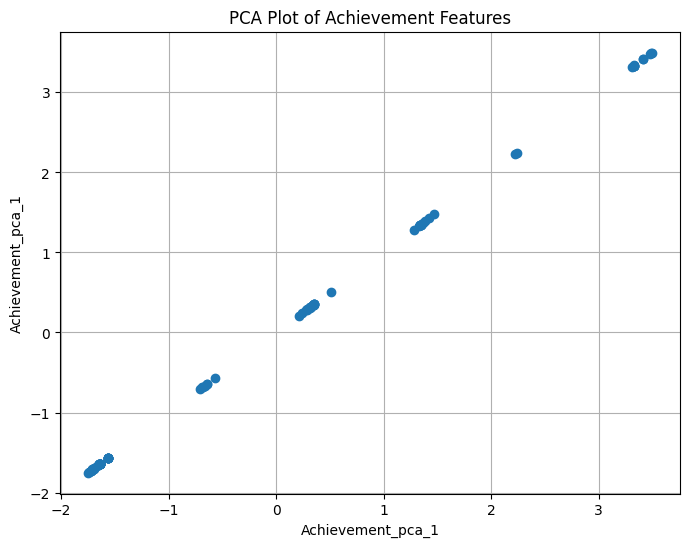

Explained Variance Ratio: [0.58010076]


In [2427]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select the features for PCA
selected_features = ['cgpa', 'successfulFeelOrNot', 'internshipsOrIndustryPlacement', 'numberOfProjectsOrInitiatives', 'receiveAwardsScholarships', 'secureEmploymentOrJobOffers', 'interestCareerInTheCSEfield']

# Extract the selected features from the DataFrame
X = labeled_data[selected_features]

# Perform PCA
pca = PCA(n_components=1)  # You can adjust the number of components as needed
X_pca = pca.fit_transform(X)

# Create a DataFrame with the principal components and rename columns
achievement_pca_df = pd.DataFrame(data=X_pca, columns=['Achievement_pca_1'])

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(achievement_pca_df['Achievement_pca_1'], achievement_pca_df['Achievement_pca_1'])
plt.title('PCA Plot of Achievement Features')
plt.xlabel('Achievement_pca_1')
plt.ylabel('Achievement_pca_1')
plt.grid(True)
plt.savefig("PCA Plot of Achievement Features.pdf")
plt.show()

# Print explained variance ratio
print('Explained Variance Ratio:', pca.explained_variance_ratio_)

In [2428]:
import pandas as pd

# Assuming achievement_pca_df is the DataFrame containing the principal components for the student achievement
print("DataFrame for Student achievement Principal Components:")
print(achievement_pca_df)

# Similarly, print DataFrames for other categories if available

DataFrame for Student achievement Principal Components:
    Achievement_pca_1
0           -1.726957
1           -1.565142
2            3.416655
3           -1.641194
4            0.318967
..                ...
84           3.413067
85           3.309656
86           0.343923
87          -1.640876
88          -1.565142

[89 rows x 1 columns]


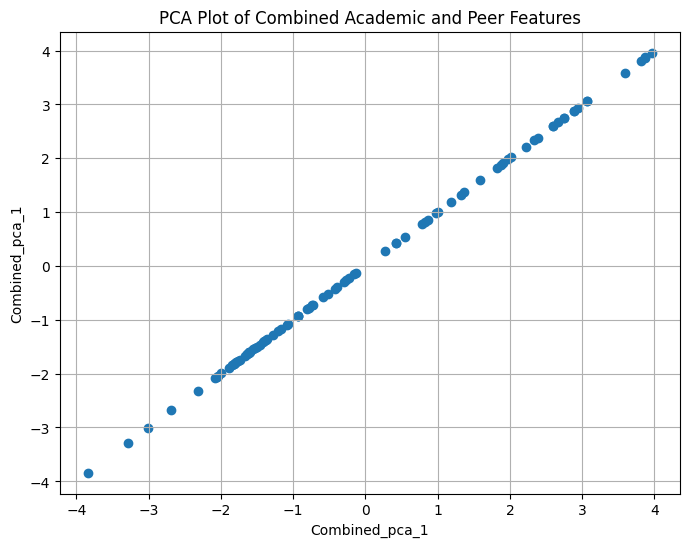

Explained Variance Ratio: [0.27195588]


In [2429]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select the features for PCA
selected_features = ['programmingClub', 'programmingContest', 'projectShowcasing',
                     'seminarWorkshop', 'researchOpportunities', 'fundingSupportResearch',
                     'studentTeacherRatio', 'qualityOfTeaching', 'programmingEnvironment',
                     'specializedLabs', 'onCampusRecruitment', 'finallyAcademicEnvironmentAndPeerMentoringSupport','supportiveTeachersTechnicalSkill', 'arrangePeerMentoringPrograms', 'arrangePeerledWorkshopsOrTutorials']

# Extract the selected features from the DataFrame
X = labeled_data[selected_features]

# Perform PCA
pca = PCA(n_components=1)  # You can adjust the number of components as needed
X_pca = pca.fit_transform(X)

# Create a DataFrame with the principal components and rename columns
combined_pca_df = pd.DataFrame(data=X_pca, columns=['Combined_pca_1'])

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(combined_pca_df['Combined_pca_1'], combined_pca_df['Combined_pca_1'])
plt.title('PCA Plot of Combined Academic and Peer Features')
plt.xlabel('Combined_pca_1')
plt.ylabel('Combined_pca_1')
plt.grid(True)
plt.savefig("PCA Plot of Combined Academic and Peer Features.pdf")
plt.show()

# Print explained variance ratio
print('Explained Variance Ratio:', pca.explained_variance_ratio_)


# Correlation

In [2430]:
import numpy as np

# Assuming you have the principal components stored in academic_pca_df and achievement_pca_df DataFrames

# Extract the principal component arrays
academic_pca_values = academic_pca_df.values.flatten()  # Flatten the DataFrame to a 1D array
achievement_pca_values = achievement_pca_df.values.flatten()  # Flatten the DataFrame to a 1D array

# Calculate correlation coefficient between academic_pca_values and achievement_pca_values
correlation_academic_achievement = np.corrcoef(academic_pca_values, achievement_pca_values)[0, 1]

# Print correlation coefficient
print("Correlation coefficient between academic_pca_df and achievement_pca_df:", correlation_academic_achievement)


Correlation coefficient between academic_pca_df and achievement_pca_df: -0.21166377539797637


In [2431]:
import numpy as np

# Assuming you have the principal components stored in peer_pca_df and achievement_pca_df DataFrames

# Extract the principal component arrays
peer_pca_values = peer_pca_df.values.flatten()  # Flatten the DataFrame to a 1D array
achievement_pca_values = achievement_pca_df.values.flatten()  # Flatten the DataFrame to a 1D array

# Calculate correlation coefficient between peer_pca_values and achievement_pca_values
correlation_peer_achievement = np.corrcoef(peer_pca_values, achievement_pca_values)[0, 1]

# Print correlation coefficient
print("Correlation coefficient between peer_pca_df and achievement_pca_df:", correlation_peer_achievement)

Correlation coefficient between peer_pca_df and achievement_pca_df: 0.12235815307960086


In [2432]:
import numpy as np

# Assuming you have the principal components stored in academic_pca_df and peer_pca_df DataFrames

# Extract the principal component arrays
academic_pca_values = academic_pca_df.values.flatten()  # Flatten the DataFrame to a 1D array
peer_pca_values = peer_pca_df.values.flatten()  # Flatten the DataFrame to a 1D array

# Calculate correlation coefficient between academic_pca_values and peer_pca_values
correlation_academic_peer = np.corrcoef(academic_pca_values, peer_pca_values)[0, 1]

# Print correlation coefficient
print("Correlation coefficient between academic_pca_df and peer_pca_df:", correlation_academic_peer)

Correlation coefficient between academic_pca_df and peer_pca_df: 0.03249062986590468


In [2433]:
import numpy as np

# Assuming you have the principal components stored in combined_pca_df and achievement_pca_df DataFrames

# Extract the principal component arrays
combined_pca_values = combined_pca_df.values.flatten()  # Flatten the DataFrame to a 1D array
achievement_pca_values = achievement_pca_df.values.flatten()  # Flatten the DataFrame to a 1D array

# Calculate correlation coefficient between combined_pca_values and achievement_pca_values
correlation_combined_achievement = np.corrcoef(combined_pca_values, achievement_pca_values)[0, 1]

# Print correlation coefficient
print("Correlation coefficient between combined_pca_df and achievement_pca_df:", correlation_combined_achievement)

Correlation coefficient between combined_pca_df and achievement_pca_df: 0.2144421976285941


In [2434]:
# Calculate correlation coefficient between combined_pca_df and cgpa
correlation_coefficient = combined_pca_df['Combined_pca_1'].corr(labeled_data['cgpa'])

# Print correlation coefficient
print("Correlation coefficient between combined_pca_df and cgpa:", correlation_coefficient)


Correlation coefficient between combined_pca_df and cgpa: -0.09934151723551679


In [2435]:
# Calculate correlation coefficient between combined_pca_df and successfulFeelOrNot
correlation_coefficient = combined_pca_df['Combined_pca_1'].corr(labeled_data['successfulFeelOrNot'])

# Print correlation coefficient
print("Correlation coefficient between combined_pca_df and successfulFeelOrNot:", correlation_coefficient)

Correlation coefficient between combined_pca_df and successfulFeelOrNot: 0.20748034548425023


In [2436]:
# Calculate correlation coefficient between combined_pca_df and internshipsOrIndustryPlacement
correlation_coefficient = combined_pca_df['Combined_pca_1'].corr(labeled_data['internshipsOrIndustryPlacement'])

# Print correlation coefficient
print("Correlation coefficient between combined_pca_df and internshipsOrIndustryPlacement:", correlation_coefficient)

Correlation coefficient between combined_pca_df and internshipsOrIndustryPlacement: -0.17737260997377202


In [2437]:
# Calculate correlation coefficient between combined_pca_df and numberOfProjectsOrInitiatives
correlation_coefficient = combined_pca_df['Combined_pca_1'].corr(labeled_data['numberOfProjectsOrInitiatives'])

# Print correlation coefficient
print("Correlation coefficient between combined_pca_df and numberOfProjectsOrInitiatives:", correlation_coefficient)

Correlation coefficient between combined_pca_df and numberOfProjectsOrInitiatives: 0.027232200322662534


In [2438]:
# Calculate correlation coefficient between combined_pca_df and receiveAwardsScholarships
correlation_coefficient = combined_pca_df['Combined_pca_1'].corr(labeled_data['receiveAwardsScholarships'])

# Print correlation coefficient
print("Correlation coefficient between combined_pca_df and receiveAwardsScholarships:", correlation_coefficient)

Correlation coefficient between combined_pca_df and receiveAwardsScholarships: -0.048933019249708394


In [2439]:
# Calculate correlation coefficient between combined_pca_df and secureEmploymentOrJobOffers
correlation_coefficient = combined_pca_df['Combined_pca_1'].corr(labeled_data['secureEmploymentOrJobOffers'])

# Print correlation coefficient
print("Correlation coefficient between combined_pca_df and secureEmploymentOrJobOffers:", correlation_coefficient)

Correlation coefficient between combined_pca_df and secureEmploymentOrJobOffers: -0.13110030196009886


In [2440]:
# Calculate correlation coefficient between combined_pca_df and interestCareerInTheCSEfield
correlation_coefficient = combined_pca_df['Combined_pca_1'].corr(labeled_data['interestCareerInTheCSEfield'])

# Print correlation coefficient
print("Correlation coefficient between combined_pca_df and interestCareerInTheCSEfield:", correlation_coefficient)

Correlation coefficient between combined_pca_df and interestCareerInTheCSEfield: -0.21817459610722878


In [2441]:
from scipy.stats import pearsonr

# Compute Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(academic_pca_df['Academic_pca_1'], achievement_pca_df['Achievement_pca_1'])

# Print correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject null hypothesis: There is no significant correlation.")

Pearson correlation coefficient: -0.21166377539797648
P-value: 0.04645602233556057
Reject null hypothesis: There is a significant correlation.


In [2442]:
from scipy.stats import pearsonr

# Compute Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(peer_pca_df['Peer_pca_1'], achievement_pca_df['Achievement_pca_1'])

# Print correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject null hypothesis: There is no significant correlation.")

Pearson correlation coefficient: 0.12235815307960073
P-value: 0.2533274405708964
Fail to reject null hypothesis: There is no significant correlation.


In [2443]:
from scipy.stats import pearsonr

# Compute Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(academic_pca_df['Academic_pca_1'], peer_pca_df['Peer_pca_1'])

# Print correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject null hypothesis: There is no significant correlation.")

Pearson correlation coefficient: 0.03249062986590467
P-value: 0.7624517943675418
Fail to reject null hypothesis: There is no significant correlation.


In [2444]:
from scipy.stats import pearsonr

# Compute Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(combined_pca_df['Combined_pca_1'], achievement_pca_df['Achievement_pca_1'])

# Print correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject null hypothesis: There is no significant correlation.")

Pearson correlation coefficient: 0.21444219762859404
P-value: 0.04359276546368748
Reject null hypothesis: There is a significant correlation.


In [2445]:
from scipy.stats import pearsonr

# Compute Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(combined_pca_df['Combined_pca_1'], labeled_data['cgpa'])

# Print correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject null hypothesis: There is no significant correlation.")


Pearson correlation coefficient: -0.09934151723551676
P-value: 0.35432582193693796
Fail to reject null hypothesis: There is no significant correlation.


In [2446]:
from scipy.stats import pearsonr

# Compute Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(combined_pca_df['Combined_pca_1'], labeled_data['successfulFeelOrNot'])

# Print correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject null hypothesis: There is no significant correlation.")

Pearson correlation coefficient: 0.20748034548425026
P-value: 0.05105922067081532
Fail to reject null hypothesis: There is no significant correlation.


In [2447]:
from scipy.stats import pearsonr

# Compute Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(combined_pca_df['Combined_pca_1'], labeled_data['internshipsOrIndustryPlacement'])

# Print correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject null hypothesis: There is no significant correlation.")

Pearson correlation coefficient: -0.1773726099737719
P-value: 0.09633480884417912
Fail to reject null hypothesis: There is no significant correlation.


In [2448]:
from scipy.stats import pearsonr

# Compute Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(combined_pca_df['Combined_pca_1'], labeled_data['numberOfProjectsOrInitiatives'])

# Print correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject null hypothesis: There is no significant correlation.")

Pearson correlation coefficient: 0.027232200322662527
P-value: 0.8000184386790284
Fail to reject null hypothesis: There is no significant correlation.


In [2449]:
from scipy.stats import pearsonr

# Compute Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(combined_pca_df['Combined_pca_1'], labeled_data['receiveAwardsScholarships'])

# Print correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject null hypothesis: There is no significant correlation.")

Pearson correlation coefficient: -0.04893301924970835
P-value: 0.6488357113547901
Fail to reject null hypothesis: There is no significant correlation.


In [2450]:
from scipy.stats import pearsonr

# Compute Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(combined_pca_df['Combined_pca_1'], labeled_data['secureEmploymentOrJobOffers'])

# Print correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject null hypothesis: There is no significant correlation.")

Pearson correlation coefficient: -0.1311003019600988
P-value: 0.22072328859801346
Fail to reject null hypothesis: There is no significant correlation.


In [2451]:
from scipy.stats import pearsonr

# Compute Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(combined_pca_df['Combined_pca_1'], labeled_data['interestCareerInTheCSEfield'])

# Print correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject null hypothesis: There is no significant correlation.")

Pearson correlation coefficient: -0.21817459610722847
P-value: 0.03997835868417345
Reject null hypothesis: There is a significant correlation.


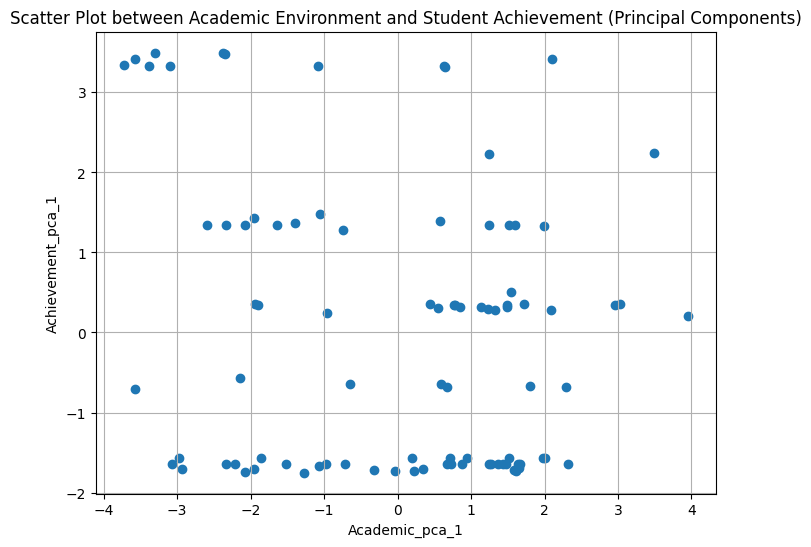

In [2452]:
import matplotlib.pyplot as plt

# Scatter plot between Academic_pca_1 and Achievement_pca_1
plt.figure(figsize=(8, 6))
plt.scatter(academic_pca_df['Academic_pca_1'], achievement_pca_df['Achievement_pca_1'])
plt.title('Scatter Plot between Academic Environment and Student Achievement (Principal Components)')
plt.xlabel('Academic_pca_1')
plt.ylabel('Achievement_pca_1')
plt.grid(True)
plt.show()



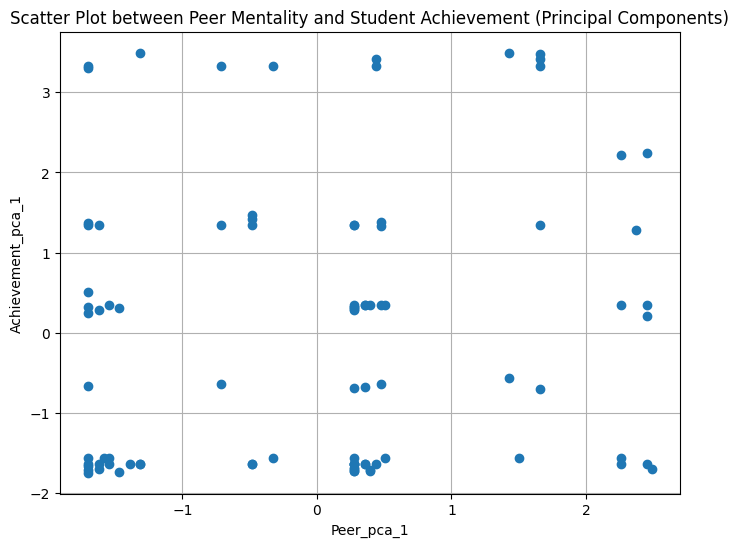

In [2453]:
import matplotlib.pyplot as plt

# Scatter plot between Peer_pca_1 and Achievement_pca_1
plt.figure(figsize=(8, 6))
plt.scatter(peer_pca_df['Peer_pca_1'], achievement_pca_df['Achievement_pca_1'])
plt.title('Scatter Plot between Peer Mentality and Student Achievement (Principal Components)')
plt.xlabel('Peer_pca_1')
plt.ylabel('Achievement_pca_1')
plt.grid(True)
plt.show()

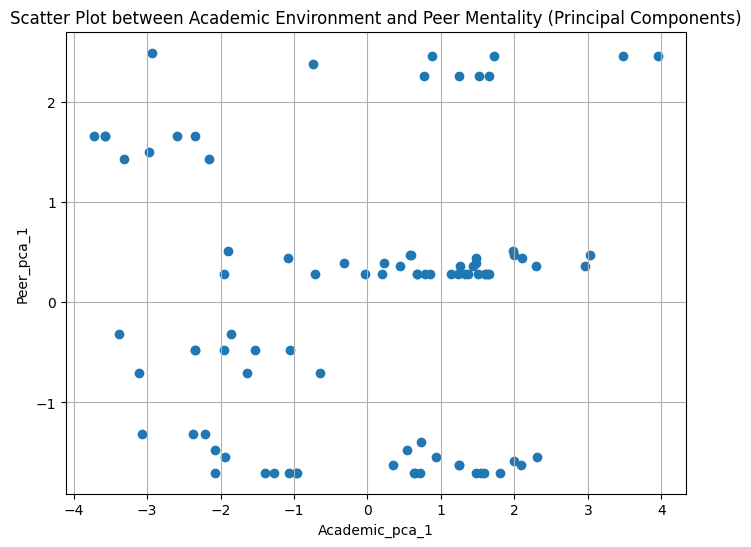

In [2454]:
import matplotlib.pyplot as plt

# Scatter plot between Academic_pca_1 and Peer_pca_1
plt.figure(figsize=(8, 6))
plt.scatter(academic_pca_df['Academic_pca_1'], peer_pca_df['Peer_pca_1'])
plt.title('Scatter Plot between Academic Environment and Peer Mentality (Principal Components)')
plt.xlabel('Academic_pca_1')
plt.ylabel('Peer_pca_1')
plt.grid(True)
plt.show()

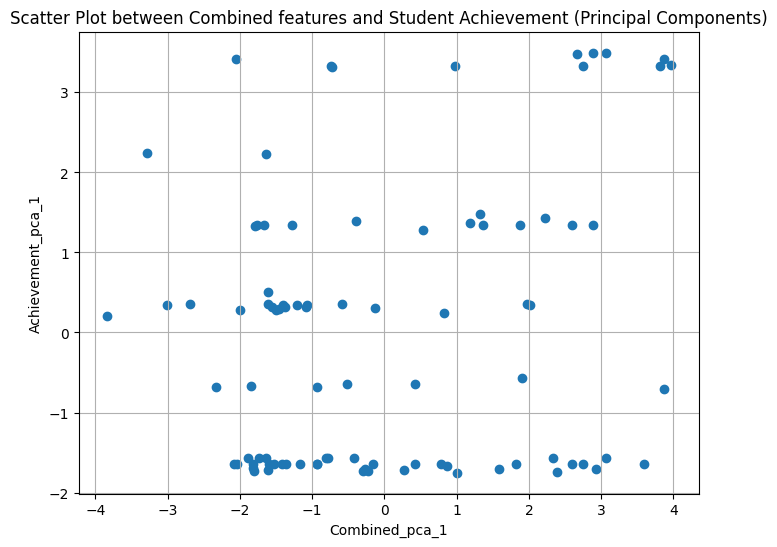

In [2455]:
import matplotlib.pyplot as plt

# Scatter plot between Combined_pca_1 and Achievement_pca_1
plt.figure(figsize=(8, 6))
plt.scatter(combined_pca_df['Combined_pca_1'], achievement_pca_df['Achievement_pca_1'])
plt.title('Scatter Plot between Combined features and Student Achievement (Principal Components)')
plt.xlabel('Combined_pca_1')
plt.ylabel('Achievement_pca_1')
plt.grid(True)
plt.show()